# DSCI 525 - Web and Cloud Computing

Milestone 2: Your team is planning to migrate to the cloud. AWS gave 400$ (100$ each) to your team to support this. As part of this initiative, your team needs to set up a server in the cloud, a collaborative environment for your team, and later move your data to the cloud. After that, your team can wrangle the data in preparation for machine learning.

## Milestone 2 checklist  
You will have mainly 2 tasks. Here is the checklist...
- Task 1: To set up a collaborative environment 
    - Setup your EC2 instance with JupyterHub.
    - Install all necessary things needed in your UNIX server (Amazon EC2 instance).
    - Set up your S3 bucket.
    - Move the data that you wrangled in your last milestone to S3.
- Task 2: Wrangle the data in preparation for machine learning
    - Get the data from S3 in your notebook and make data ready for machine learning.

> Everything in this milestone is to be completed in sequential order. But if you want to divide the tasks, you can ask a team member to work on Task 2 (```4. Get the data that we wrangled in our first milestone.``` and ```6. Wrangle the data in preparation for machine learning```) locally on their laptop while the other members set up the infrastructure (EC2, S3) and TLJH in the cloud. This way, you can move quick.

_***Outside of Milestone:*** I strongly recommend you spin up your own instance and experiment with the s3 bucket in doing something (there are many things that we learned and practical work from video series) to get comfortable with AWS. But we won't be looking at it for a grading purpose._

**Keep in mind:**

- _All services you use are in region ```us-west-2```._

- _Don't store anything in these servers or storage that represents your identity as a student (like your student ID number) ._

- _Use only default VPC and subnet._
    
- _No IP addresses are visible when you provide the screenshot._

- _You do proper budgeting so that you don't run out of credits._ 

- _We want one single notebook for grading, and it's up to your discretion on how you do it. ***So only one person in your group needs to spin up instance and a ```t2.large``` is of decent size.***_

- _Please stop the instance when not in use. This can save you some bucks, but it's again up to you and how you budget your money. Maybe stop it if you or your team won't use it for the next 5 hours?_

- _Your AWS lab will shut down after 4 hours (also your services). When you start it again (after it is stopped), your AWS credentials (***access key***,***secret***, and ***session token***) will change, and you want to update your credentials file with the new one._

- _If you don't want your lab to shut down, click on the start lab again before 4 hours ends. This will fill up your time to 4 hours._

- _Say something went wrong and you want to spin up another EC2 instance, then it will be good to terminate the previous one._

- _We will be choosing the storage to be ```Delete on Termination``` ( that is the default option), which means that stored data in your instance will be lost upon termination. Make sure you save any data to S3 and download the notebooks to your laptop so that next time you have your jupyterHub in a different instance, you can upload your notebook there._

- _Wherever I ask for screenshots, you can provide the screenshot location in your GitHub._

***NOTE:*** Everything you want for this notebook is discussed in lecture 3 and lecture 4. So you can follow the same order of things shown in lecture 4. You can also refer to the videos linked in each section under image ![YouTube](https://cdn.emojidex.com/emoji/hdpi/YouTube.png "YouTube") to see a demo on how to do it. In addition, I will put a link to the lecture note section that applies to each question in this milestone so that you don't get lost.

### 1. Setup your EC2 instance
- Name of the instance to be `mds-your_groupnumber`. For example if my group is 14 I would name it `mds-14`.
- AMI to be `Ubuntu server 22.04 LTS (HVM)`.
- Instance type to be `t2.large`.
- Architecture to be `64-bit(x86)`.
- Storage to be `30 GB`.
- Make sure you install TLJH in your instance, by giving instructions in `User Data`.

> Check [this](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#setting-up-an-ec2-instance) section in lecture notes for more details on setting up EC2 instance with TLJH.

rubric={correctness:20}

#### Please provide here the GitHub path to your screenshot for grading. Example screenshot below;

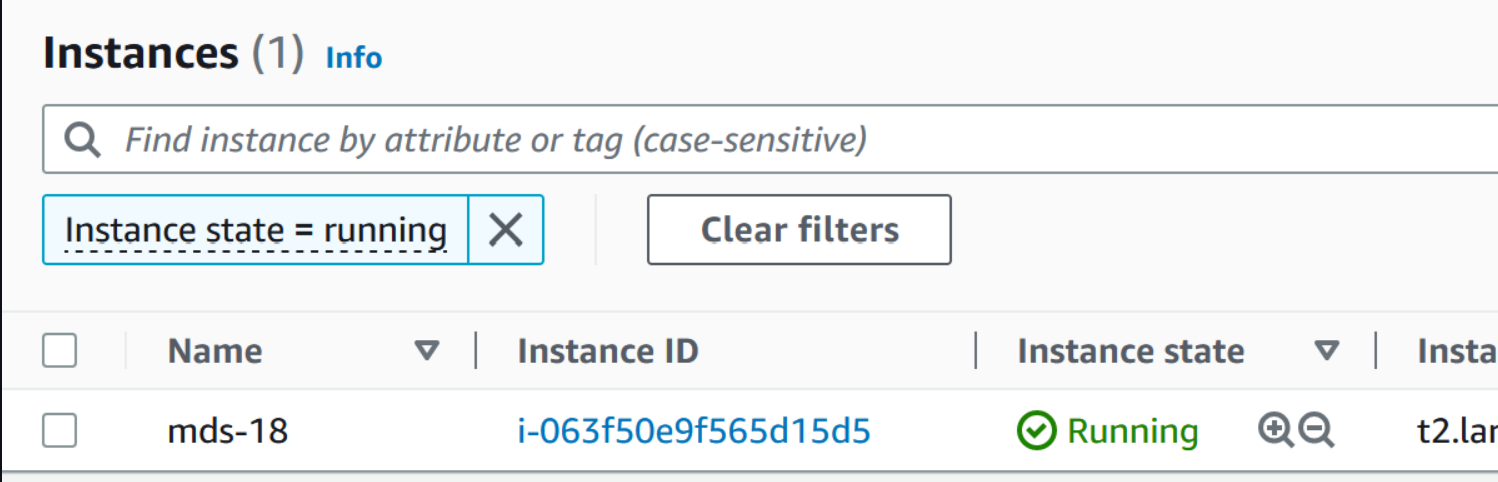

### 2. Setup the server 

rubric={correctness:20}

2.1) Add your team members to EC2 instance.

2.2) Setup a common data folder to download data, and this folder should be accessible by all users in the JupyterHub.
    
2.3) Install and configure AWS CLI.

> Check following sections in lecture notes for more details;

- [Logging into EC2s](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#logging-into-ec2)
- [Setting up a common space in EC2](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#setting-up-a-common-space-in-ec2) 
- [AWS CLI](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture3.html#aws-cli)

#### Please provide here the GitHub path to your screenshot for grading. Example screenshot below;

Make sure you mask the IP address refer [here](https://www.anysoftwaretools.com/blur-part-picture-mac/).

### 3. Setup your JupyterHub

rubric={correctness:20}

#### Please provide here the GitHub path to your screenshot for grading. Example screenshot below;

I want to see all the group members here in this screenshot 

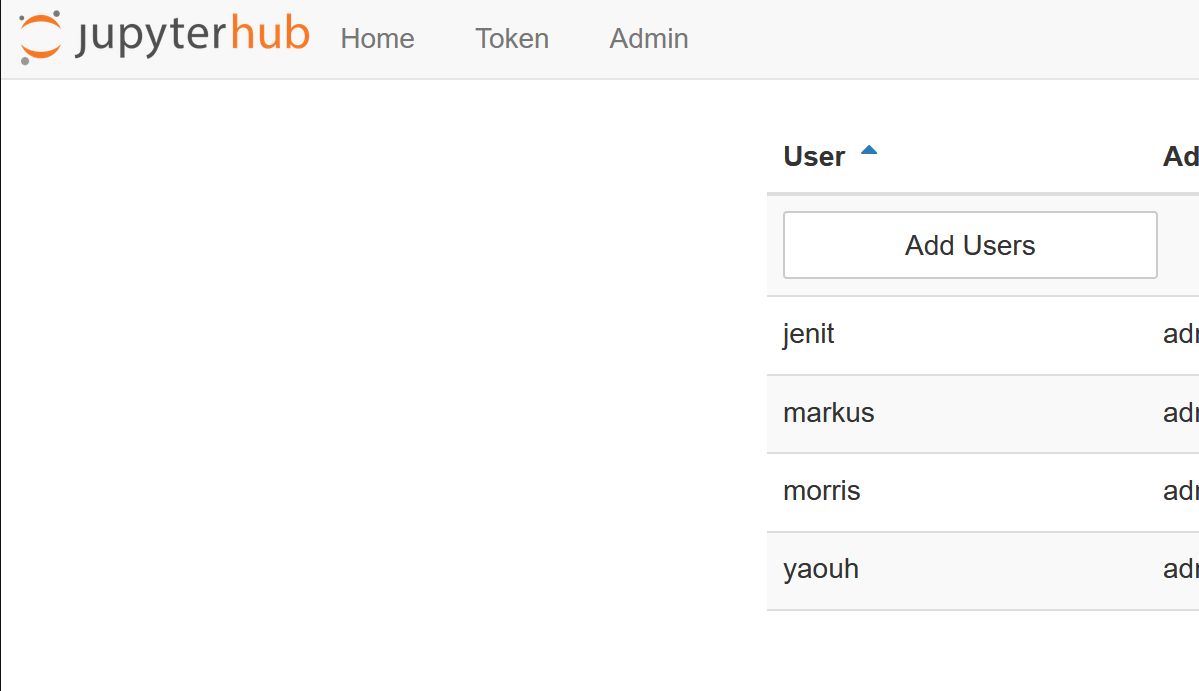

<br></br>
> Check [this](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#setup-your-jupyterhub) section in lecture notes for more details on setting up jupyterHub.

### 4. Get the data what we wrangled in our first milestone. 

You have to install the packages that are needed. Refer this TLJH [document]( https://tljh.jupyter.org/en/latest/howto/env/user-environment.html).Refer ```pip``` section.

Don't forget to add option -E. This way, all packages that you install will be available to other users in your JupyterHub.
These packages you must install and install other packages needed for your wrangling.

    sudo -E pip install pandas
    sudo -E pip install pyarrow
    sudo -E pip install s3fs

> Check [this](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#how-to-install-packages-in-tljh) section in lecture notes for more details on installing packages in TLJH.

As in the last milestone, we looked at transferring the data from Python to R, and we have different solutions. To stay consistent, I uploaded the parquet file (which I combined and converted in the last milestone), which we can use moving forward. Here in this section, I am getting that file using API; (the section is prepopulated for you)

Remember, from now on, we are going to run this notebook in the TLJH that is set up from previous steps. You can upload your notebook there using the upload button in jupyter. After that, you are going to run the following code to get the data downloaded to your EC2 instance and then you move to questions 5 and 6.

In [1]:
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd

Rememeber here we gave the folder that we created in Step 2.2 as we made it available for all the users in a group.

In [3]:
# Necessary metadata
article_id = 14226968  # this is the unique identifier of the article on figshare
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "/srv/data/my_shared_data_folder/"

In [4]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  # this contains all the articles data, feel free to check it out
files = data["files"]             # this is just the data about the files, which is what we want
files

[{'is_link_only': False,
  'name': 'allyears.csv.zip',
  'supplied_md5': '9e046ac05ecd2c32a256a47dd1098b81',
  'computed_md5': '9e046ac05ecd2c32a256a47dd1098b81',
  'id': 26844650,
  'download_url': 'https://ndownloader.figshare.com/files/26844650',
  'size': 2405908113},
 {'is_link_only': False,
  'name': 'individual_years.zip',
  'supplied_md5': '921da748974b07b2a70bbfcc04535a77',
  'computed_md5': '921da748974b07b2a70bbfcc04535a77',
  'id': 26863682,
  'download_url': 'https://ndownloader.figshare.com/files/26863682',
  'size': 1896206676},
 {'is_link_only': False,
  'name': 'combined_model_data.csv.zip',
  'supplied_md5': '7638434c44a7d29cbb29fe200b4fd65d',
  'computed_md5': '7638434c44a7d29cbb29fe200b4fd65d',
  'id': 27515426,
  'download_url': 'https://ndownloader.figshare.com/files/27515426',
  'size': 821308997},
 {'is_link_only': False,
  'name': 'combined_model_data_parti.parquet.zip',
  'supplied_md5': '02f4e3df8d16580a02291de225072689',
  'computed_md5': '02f4e3df8d16580a02

In [5]:
files_to_dl = ["combined_model_data_parti.parquet.zip"]  ## Please download the partitioned 
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

In [6]:
with zipfile.ZipFile(os.path.join(output_directory, "combined_model_data_parti.parquet.zip"), 'r') as f:
    f.extractall(output_directory)

### 5. Setup your S3 bucket and move data

rubric={correctness:15}

> Check [this](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#setting-up-s3-bucket) section in lecture notes for more details on setting up S3 bucket and ***making it public***. 

5.1)  Create a bucket and name should be mds-s3-groupnumber-studentname. Replace groupnumber with your "group number", and studentname with your "student name". For example, if my group is 14 and my name is "Gittu George", then I would name it "mds-s3-14-gittu". (Note: For the purpose of this milestone only one student need to create this.)

5.2)  Create your first folder called "output".

5.3) Move the "observed_daily_rainfall_SYD.csv" file from the Milestone1 data folder to your s3 bucket from your local computer.

5.4) Moving the parquet file we downloaded(combined_model_data_parti.parquet) in step 4 to S3 using the cli what we installed in step 2.3.


> Check [this](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#how-to-transfer-data-to-s3) section in lecture notes for more details on moving data to S3.

#### Please provide here the GitHub path to your screenshot for grading. Example screenshot below;

Make sure it has 3 objects and see red `public` symbol in your bucket. Refer below screenshot for reference.

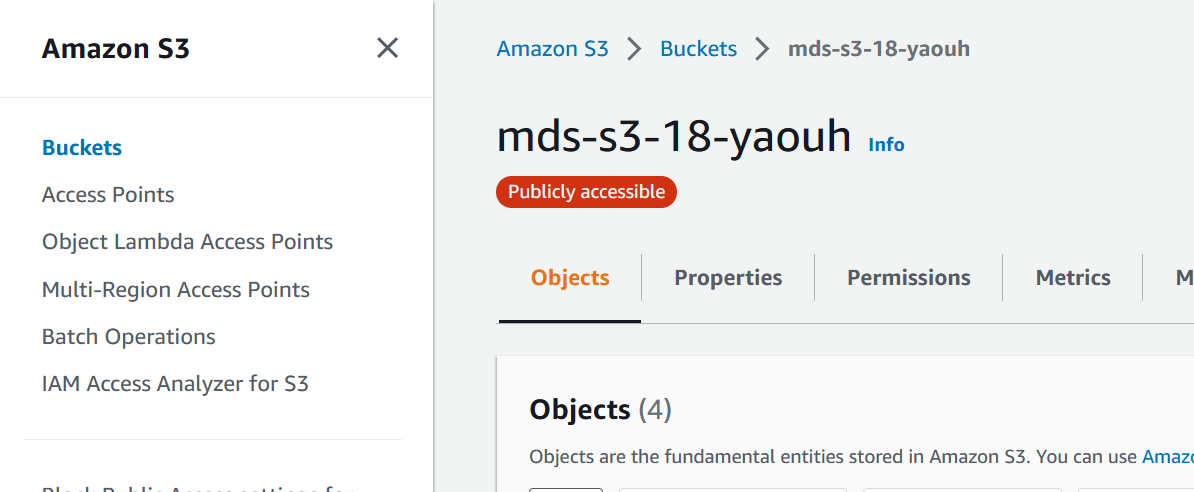

### 6. Wrangle the data in preparation for machine learning

rubric={correctness:20}

> ***IMPORTANT:*** Don't forget to deal with the credentials before you start this section. Check details in lecture notes [here](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#more-about-credentials)

> Check [this](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture4.html#how-to-read-data-from-s3) section in lecture notes for more details on how to read data from S3.

Our data currently covers all of NSW, but say that our client wants us to create a machine learning model to predict rainfall over Sydney only. There's a bit of wrangling that needs to be done for that:
1. We need to query our data for only the rows that contain information covering Sydney
2. We need to wrangle our data into a format suitable for training a machine learning model. That will require pivoting, resampling, grouping, etc.

To train an ML algorithm we need it to look like this:

||model-1_rainfall|model-2_rainfall|model-3_rainfall|...|observed_rainfall|
|---|---|---|---|---|---|
|0|0.12|0.43|0.35|...|0.31|
|1|1.22|0.91|1.68|...|1.34|
|2|0.68|0.29|0.41|...|0.57|

6.1) Get the data from s3 (```combined_model_data_parti.parquet``` and ```observed_daily_rainfall_SYD.csv```)

6.2) First query for Sydney data and then drop the lat and lon columns (we don't need them).
```
syd_lat = -33.86
syd_lon = 151.21
```
Expected shape ```(1150049, 2)```.

6.3) Save this processed file to s3 for later use:

  Save as a csv file ```ml_data_SYD.csv``` to ```s3://mds-s3-xxx/output/```
  expected shape ```(46020,26)``` - This includes all the models as columns and also adding additional column ```Observed``` loaded from ```observed_daily_rainfall_SYD.csv``` from s3.

In [1]:
### Do all your coding here

In [2]:
df_s3 = pd.read_parquet('s3://mds-s3-18-yaouh/combined_model_data_parti_morris_apr6.parquet',
                    filters=[('lat_min', '<=', -33.86), ('lat_max', '>=', -33.86),
                             ('lon_min', '<=', 151.21), ('lon_max', '>=', 151.21)],
                    columns = ['time', 'rain (mm/day)', 'model'])

In [3]:
df_s3.shape

(1150049, 3)

In [4]:
df_s3['time'] = df_s3.time.dt.date

In [5]:
df_s3.head()

,time,rain (mm/day),model
0,1889-01-01,0.040427,ACCESS-CM2
1,1889-01-02,0.073777,ACCESS-CM2
2,1889-01-03,0.232656,ACCESS-CM2
3,1889-01-04,0.911319,ACCESS-CM2
4,1889-01-05,0.698013,ACCESS-CM2


In [8]:
observed = pd.read_csv('s3://mds-s3-18-yaouh/observed_daily_rainfall_SVD.csv')

In [9]:
final = pd.pivot(df_s3, columns = 'model', index = 'time', values = 'rain (mm/day)').rename_axis(None, axis =1)
final['observed'] = observed['rain (mm/day)']

In [10]:
final.shape

(46020, 26)

In [11]:
final

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,3.557934e+01,4.268112e+00,1.107466e-03,1.141054e+01,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,NaN
1889-01-02,0.073777,0.303965,4.596520e+00,1.190141e+00,1.015323e-04,4.014984e+00,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,NaN
1889-01-03,0.232656,0.019976,5.927467e+00,1.003845e-09,1.760345e-05,9.660565e+00,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,NaN
1889-01-04,0.911319,13.623777,8.029624e+00,8.225225e-02,1.808932e-01,3.951528e+00,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,NaN
1889-01-05,0.698013,0.021048,2.132686e+00,2.496841e+00,4.708019e-09,2.766362e+00,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,0.033748,0.123476,1.451179e+00,3.852845e+01,2.061717e-03,8.179260e-09,1.171263e-02,0.090786,59.895053,5.071783,...,4.726998e-13,1.326889e-01,1.827857e+00,6.912632e-03,2.171327e-03,1.620489e+00,2.084252,0.868046,17.444923,NaN
2014-12-28,0.094198,2.645496,4.249335e+01,5.833801e-01,5.939502e-09,8.146937e-01,4.938899e-01,0.000000,0.512632,1.578188,...,4.609420e-13,1.644482e+00,7.242920e-01,2.836752e-03,1.344768e+01,2.391159e+00,1.644527,0.782258,1.569647,NaN
2014-12-29,0.005964,3.041667,2.898325e+00,9.359547e-02,2.000051e-08,2.532205e-01,1.306046e+00,0.000002,37.169669,1.565885,...,2.016156e+01,1.506439e+00,1.049481e-01,8.137182e+00,2.547820e+01,1.987695e-12,0.205036,2.140723,1.444630,NaN


How the final file format looks like
<img src="image/finaloutput.png" >

Shape ```(46020,26 )```

<br><br>
## Submission instructions
rubric={mechanics:5}

In the textbox provided on Canvas for the Milestone 2 assignment include:

- The GitHub URL to your Milestone 2 folder.

In this milestone 2 folder, you should have this notebook and screenshots asked in this notebook.